# Linear Regression on Movie Collection Dataset
## Data Preprocessing

In [2]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
dataset = pd.read_csv("Movie_collection_train.csv")
dataset.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,392.000000,400.000000,400.000000,400.000000
mean,48646.500000,55.017181,73.832700,0.469881,35197.771537,137.581750,7.810275,7.982813,7.813375,7.993888,7.894100,463223.567500,157.790000,258.083840,38.715000,523.650000
std,18308.499136,119.755634,13.023426,0.113920,4075.766926,28.990673,1.088694,1.089923,1.093581,1.088619,0.672413,65225.567649,31.723517,94.621476,12.651043,103.661283
min,10000.000000,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,215432.000000,0.000000,201.632000,3.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.360000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,159.720000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,183.210000,283.444000,50.000000,571.000000
max,100000.000000,1799.524000,106.300000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000


In [4]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

## Handling Missing records

In [5]:
# Filling missing records in 'Time_taken' column with mean.
dataset['Time_taken'].fillna(dataset['Time_taken'].mean(), inplace=True)

In [6]:
# Missings values are handled..!
dataset.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

## Checking outliers

In [7]:
# Calculating percentiles
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
# IQR = Inter Quartile Range
IQR = Q3 - Q1

In [8]:
# Checking for any outliers
((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()

3D_available            0
Avg_age_actors          0
Budget                 20
Collection             29
Critic_rating           0
Director_rating         5
Genre                   0
Lead_ Actor_Rating      5
Lead_Actress_rating     3
MPAA_film_rating        0
Marketin_expense       64
Movie_length            0
Multiplex_coverage     16
Num_multiplex          20
Producer_rating         4
Production_expense      0
Time_taken              2
Trailer_views          22
Twitter_hastags         1
dtype: int64

In [9]:
# Finding the outliers below lower bound. 
lower = (dataset < (Q1 - 1.5 * IQR))
print(lower.sum())

# filling the outliers (below lower bound) with nan values
dataset[lower] = np.nan

3D_available            0
Avg_age_actors          0
Budget                  5
Collection              0
Critic_rating           0
Director_rating         5
Genre                   0
Lead_ Actor_Rating      5
Lead_Actress_rating     3
MPAA_film_rating        0
Marketin_expense        0
Movie_length            0
Multiplex_coverage     16
Num_multiplex           0
Producer_rating         4
Production_expense      0
Time_taken              2
Trailer_views          22
Twitter_hastags         0
dtype: int64


In [10]:
# Finding lower bound of every column of dataset
lower_bound = Q1 - 1.5 * IQR
lower_bound

Collection               9750.000000
Marketin_expense            1.347425
Production_expense         33.865000
Multiplex_coverage          0.210500
Budget                  26091.140625
Movie_length               29.837500
Lead_ Actor_Rating          4.643750
Lead_Actress_rating         4.762500
Director_rating             4.699375
Producer_rating             4.787500
Critic_rating               5.700000
Trailer_views          330448.000000
Time_taken                 59.540000
Twitter_hastags           134.344000
Avg_age_actors            -10.000000
Num_multiplex             271.000000
dtype: float64

In [11]:
# Filling nan values (which are our outliers) with lower bounds..!
dataset.fillna(lower_bound, inplace=True)

In [12]:
# checking for any nan value
dataset.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [13]:
# Finding the outliers above upper bound. 
upper = (dataset > (Q3 + 1.5 * IQR))
print(upper.sum())

# filling the outliers (above upper bound) with nan values
dataset[upper] = np.nan

3D_available            0
Avg_age_actors          0
Budget                 15
Collection             29
Critic_rating           0
Director_rating         0
Genre                   0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
MPAA_film_rating        0
Marketin_expense       64
Movie_length            0
Multiplex_coverage      0
Num_multiplex          20
Producer_rating         0
Production_expense      0
Time_taken              0
Trailer_views           0
Twitter_hastags         1
dtype: int64


In [14]:
# Finding upper bound of every column of dataset
upper_bound = Q3 + 1.5 * IQR
upper_bound

Collection              84550.000000
Marketin_expense           54.612825
Production_expense        112.225000
Multiplex_coverage          0.766500
Budget                  43772.705625
Movie_length              246.737500
Lead_ Actor_Rating         11.173750
Lead_Actress_rating        11.402500
Director_rating            11.164375
Producer_rating            11.417500
Critic_rating              10.020000
Trailer_views          614036.000000
Time_taken                256.900000
Twitter_hastags           372.904000
Avg_age_actors             86.000000
Num_multiplex             751.000000
dtype: float64

In [15]:
# Filling nan values (which are our outliers) with upper bounds..!
dataset.fillna(upper_bound, inplace=True)

In [16]:
# checking for any missing value.
dataset.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [17]:
# Data summary
dataset.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,47836.375000,30.062752,73.832700,0.473141,35152.185819,137.581750,7.812959,7.984756,7.816517,7.996113,7.894100,465785.520000,158.087700,253.960100,38.715000,521.277500
std,16275.702884,12.502642,13.023426,0.104906,3732.440361,28.990673,1.080057,1.083535,1.083652,1.081352,0.672413,58346.324314,30.161242,34.171407,12.651043,97.371935
min,10000.000000,20.126400,55.920000,0.210500,26091.140625,76.400000,4.643750,4.762500,4.699375,4.787500,6.600000,330448.000000,59.540000,201.632000,3.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.550000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,158.760000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,182.890000,283.444000,50.000000,571.000000
max,84550.000000,54.612825,106.300000,0.615000,43772.705625,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,372.904000,60.000000,751.000000


## Encoding Categorical Data

In [18]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

dataset['Genre'] = LE.fit_transform(dataset['Genre'])
dataset['MPAA_film_rating'] = LE.fit_transform(dataset['MPAA_film_rating'])
dataset['3D_available'] = LE.fit_transform(dataset['3D_available'])

In [19]:
dataset.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000.0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,3,23,0,494.0,1
1,43200.0,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,2,42,0,462.0,0
2,69400.0,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051.0,147.88,372.904,1,38,0,458.0,0
3,66800.0,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,2,45,0,472.0,1
4,72400.0,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,2,55,0,395.0,0


## Locating dependent and independent variables

In [20]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

## Data Normalization

In [21]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

In [22]:
X[:4]

array([[-7.95735430e-01, -1.09268478e+00, -1.06330496e-01,
         3.68031956e-01,  3.86210567e-02,  1.11620963e-02,
         1.01871935e-01,  8.63745157e-02, -1.03009286e-03,
         6.83470839e-02,  1.05676925e+00, -1.60962948e+00,
        -8.82545484e-01,  1.08890861e+00, -1.24374569e+00,
         0.00000000e+00, -2.80488017e-01,  8.59726954e-01],
       [-7.62116477e-01, -3.60778873e-01,  5.52225189e-01,
         1.38546348e-01,  5.11778649e-01, -2.85489517e-01,
        -3.09335150e-01, -3.47887369e-01, -4.87141332e-01,
        -6.76174527e-01,  4.85118533e-01, -3.80025354e-01,
        -3.07779391e-01,  1.62177878e-01,  2.59987566e-01,
         0.00000000e+00, -6.09536373e-01, -1.16316000e+00],
       [-7.62148511e-01, -3.60778873e-01,  5.52225189e-01,
         1.27703339e+00, -1.02980850e-01, -3.04030243e-01,
        -3.83260020e-01, -2.97069489e-01, -4.45474654e-01,
        -6.76174527e-01,  1.39455662e+00, -3.38861501e-01,
         3.48516113e+00, -7.64552852e-01, -5.65878569e

## Splitting the dataset into the Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
print('X_train : ', X_train.shape, ' y_train : ', y_train.shape)
print('X_test  : ', X_test.shape, '  y_test  : ', y_test.shape)

X_train :  (300, 18)  y_train :  (300,)
X_test  :  (100, 18)   y_test  :  (100,)


## Linear Regression

In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
y_predict = reg.predict(X_test)
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df_predict

,Actual,Predicted
0,40000.0,25471.283769
1,84550.0,75893.938973
2,26200.0,36090.963393
3,43400.0,38101.374372
4,50000.0,53986.841590
...,...,...
95,47600.0,52153.194764
96,27600.0,21696.197979
97,20800.0,50877.760403
98,46600.0,51604.988871


## R2 score

In [27]:
r2_score(y_test,y_predict)

0.7325002624560346

## Accuracy

In [28]:
acc_log = round(reg.score(X_train, y_train) * 100, 2)
acc_log

75.44

## Visualizing linear model

[Text(0.5, 0, 'Y predicted'), Text(0, 0.5, 'Y Actual')]

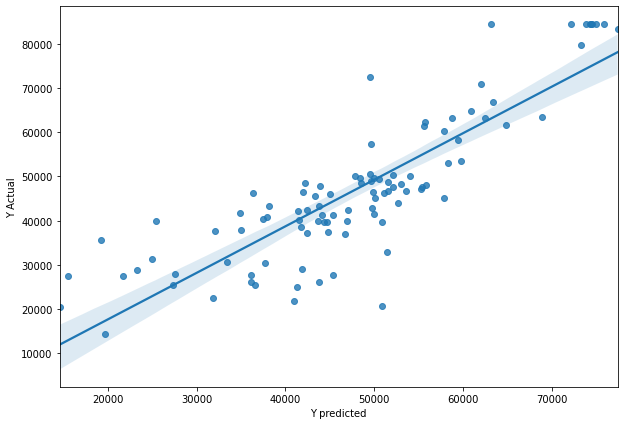

In [29]:
import seaborn as sns   
plt.figure(figsize=(10,7))
ax = sns.regplot(x=y_predict, y=y_test)
ax.set(xlabel="Y predicted", ylabel = "Y Actual")

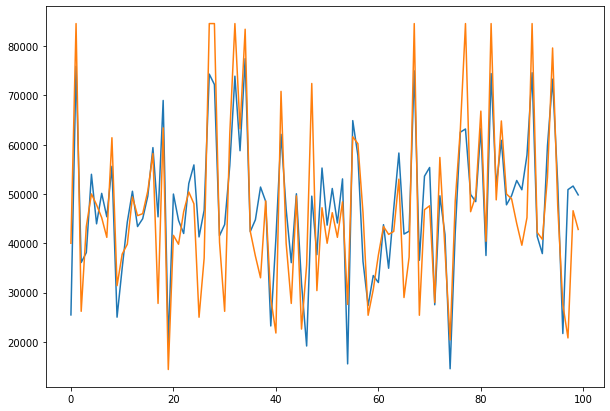

In [30]:
plt.figure(figsize=(10,7))
a = y_predict
b = y_test

plt.plot(a)
plt.plot(b)

plt.show()